# Задание
Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.

По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».

А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from collections import Counter

In [3]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([X,y], axis=1)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

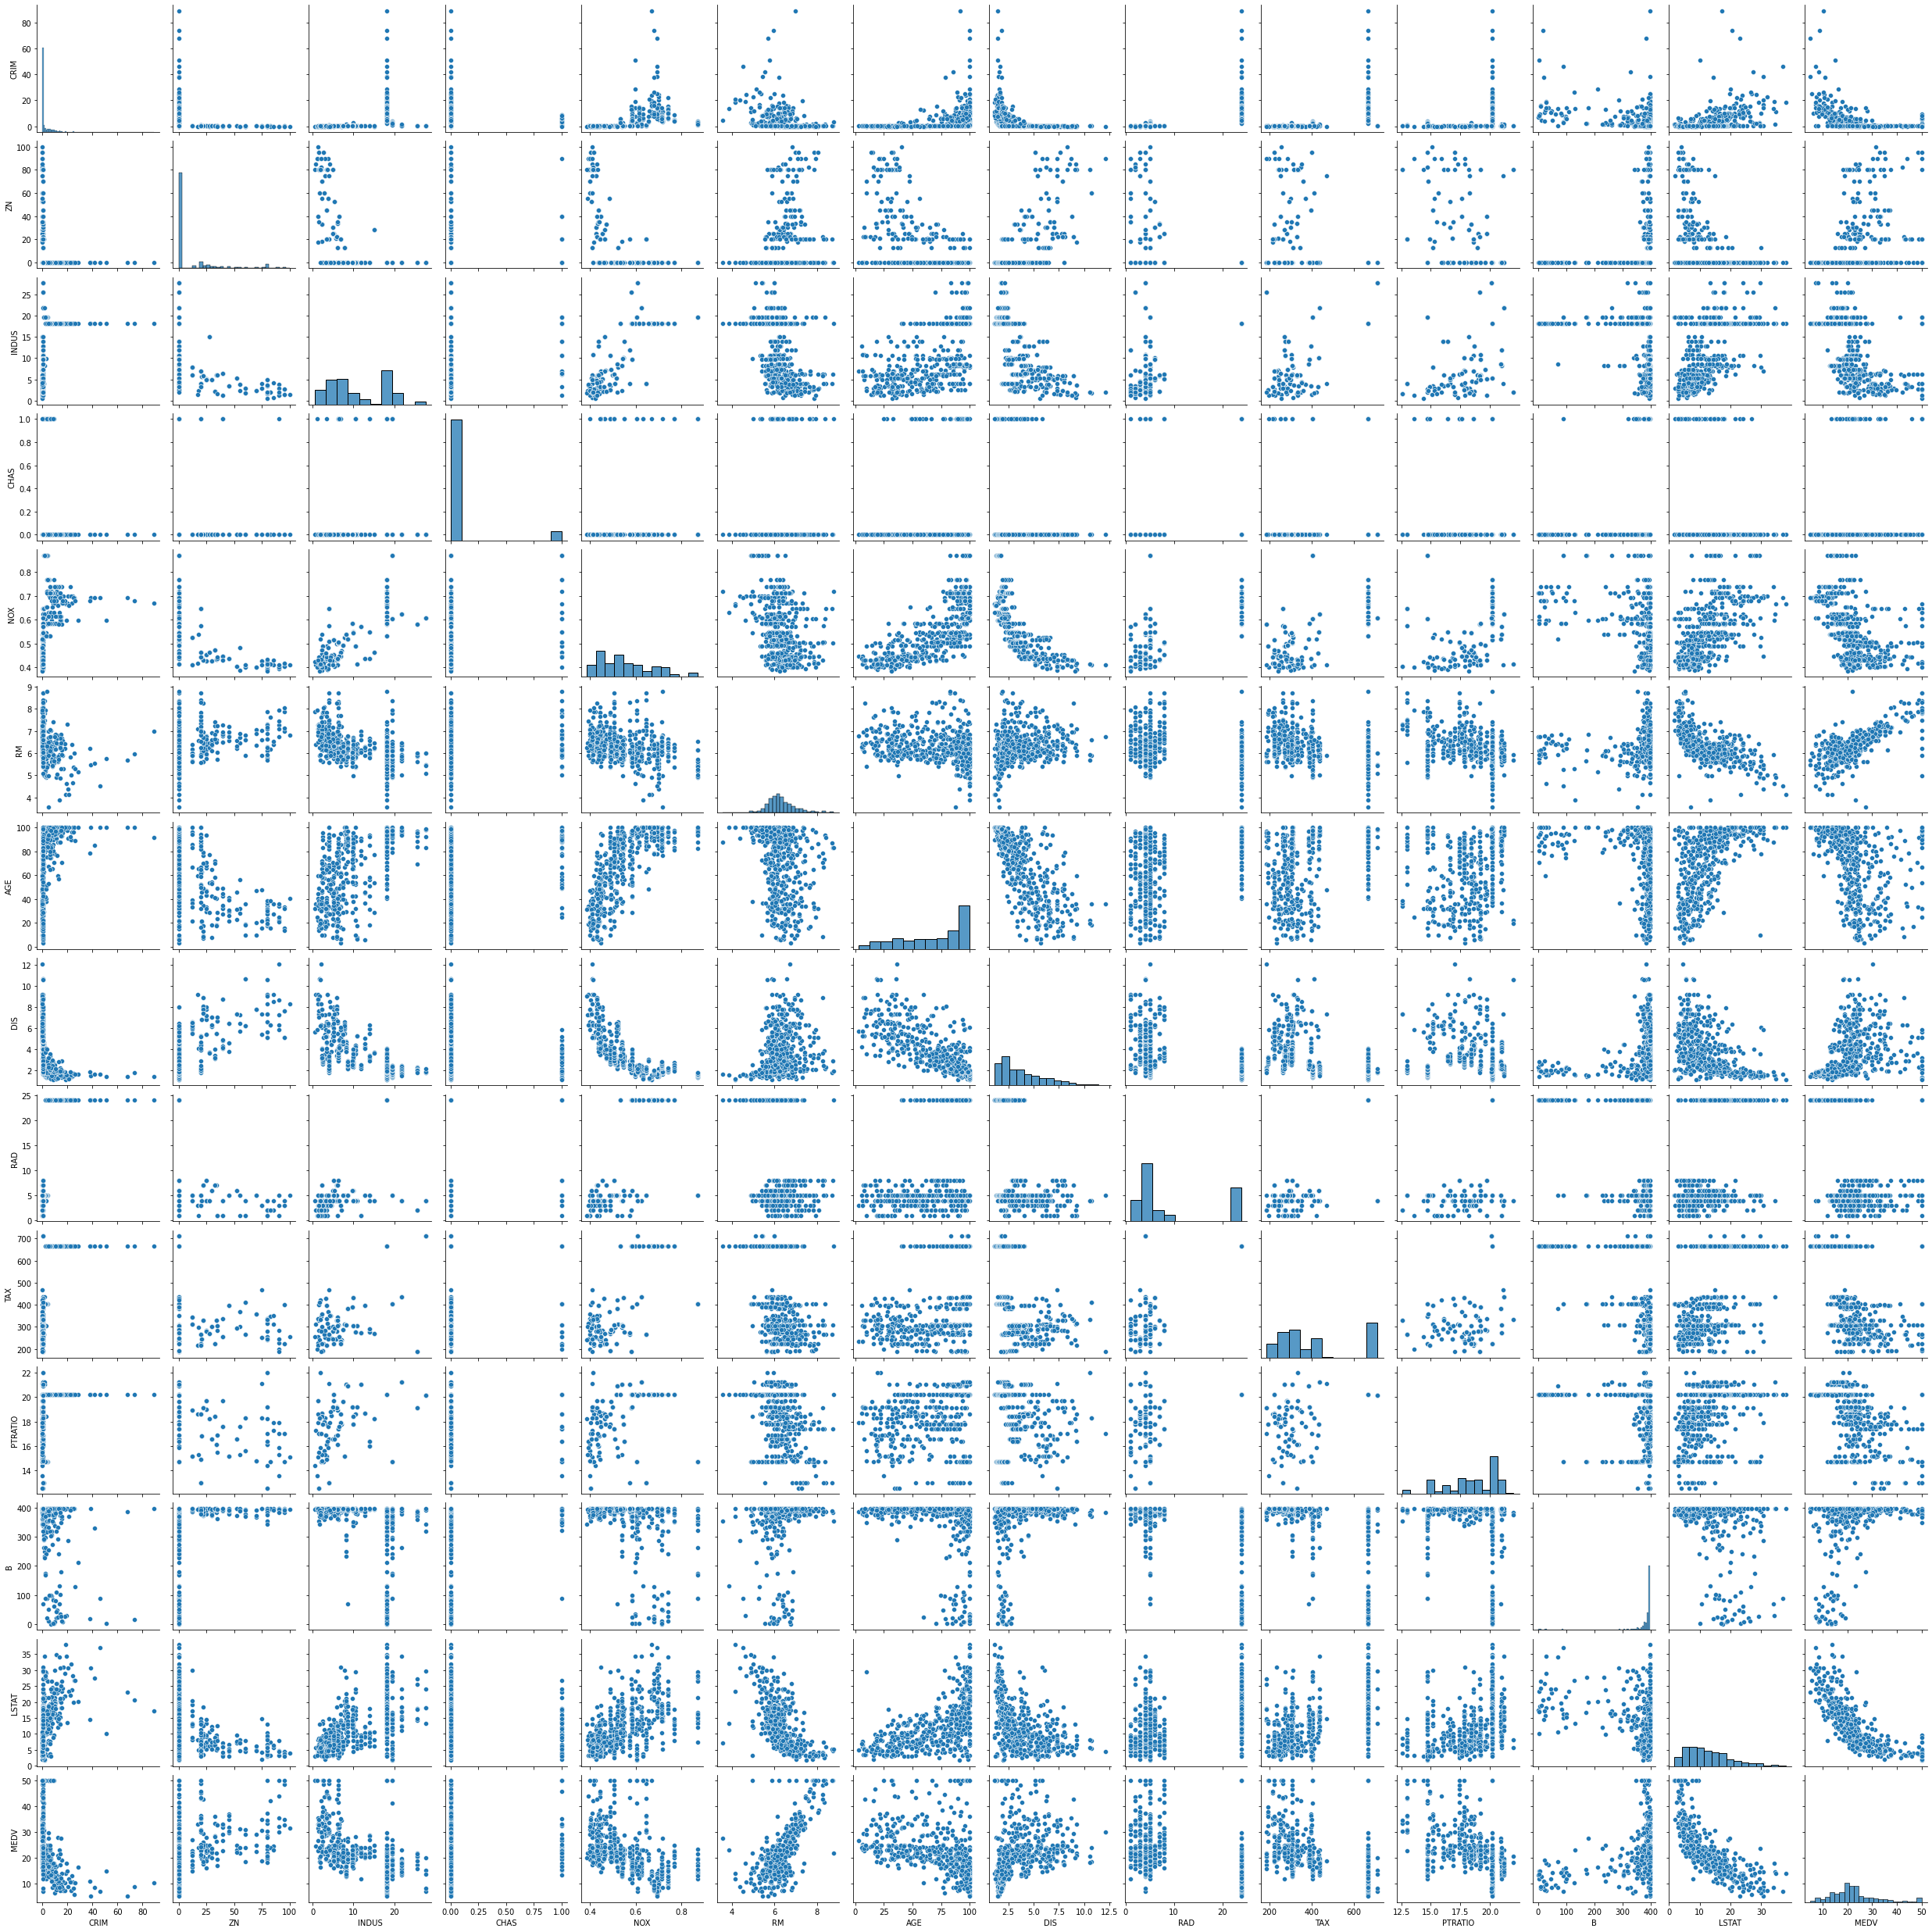

In [9]:
#sns.pairplot(df, hue='houses', diag_kind="hist")
sns.pairplot(df) 
plt.rcParams['figure.figsize']=(15,15)

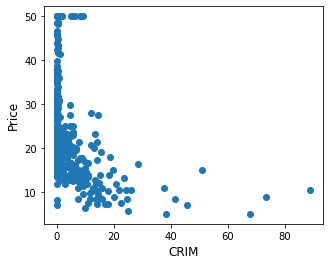

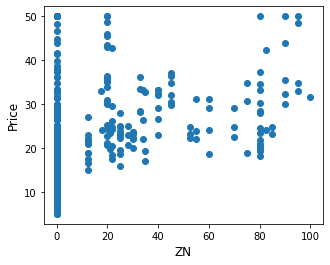

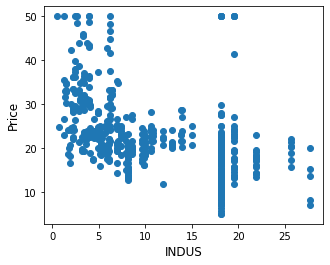

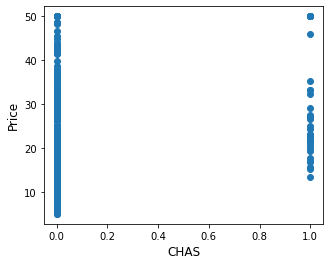

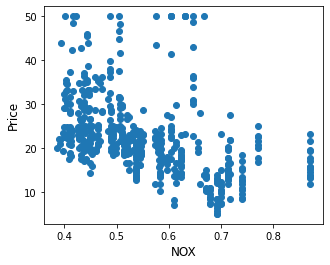

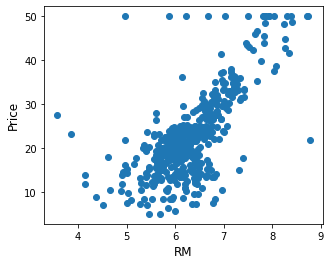

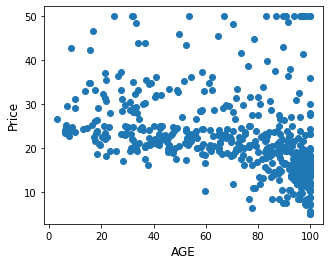

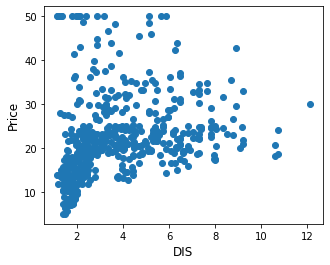

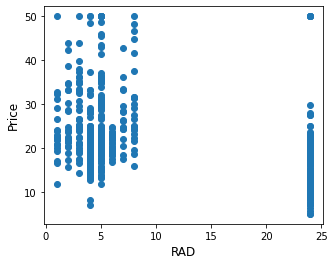

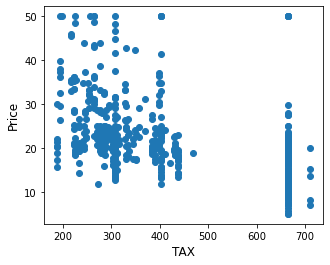

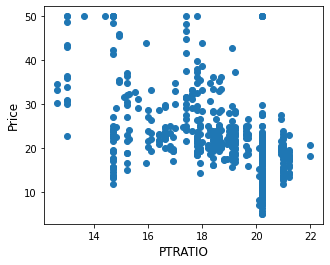

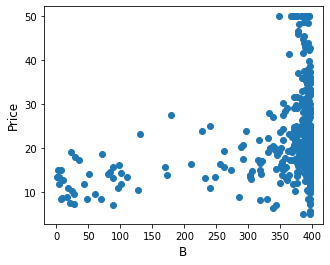

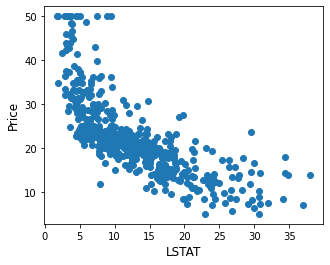

In [10]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

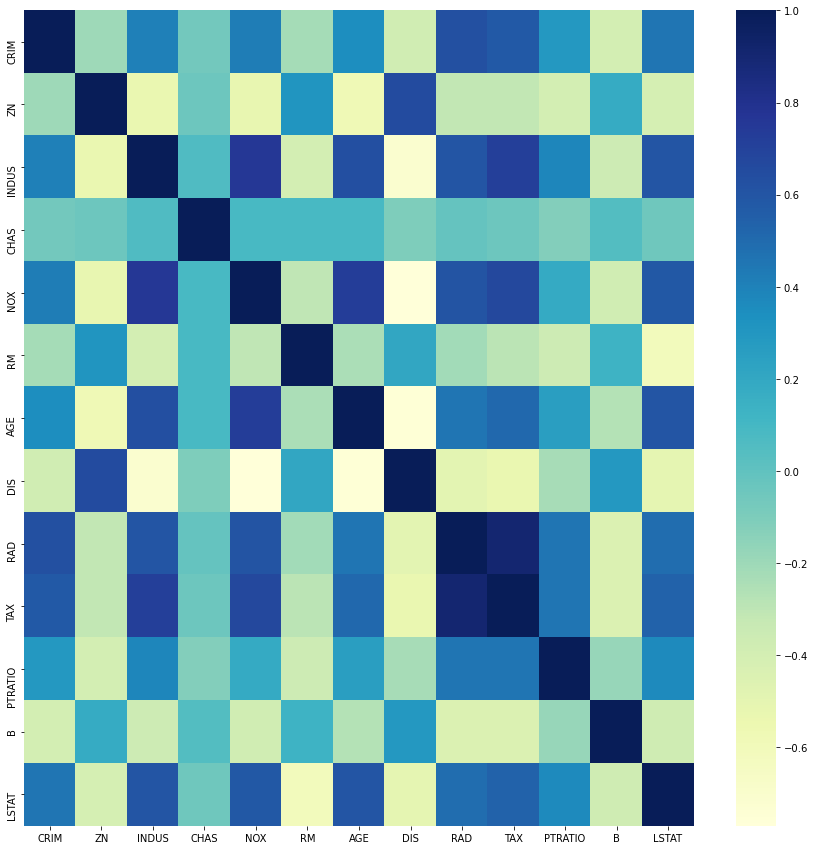

In [11]:
boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)
correlation_matrix = boston_pd.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

### Используем регрессор//классификатор
  Я передаю Регрессор в переменную clf, так как мы имеем дело с комплексными числами.
    Классификатор не подходит, так как это не бинарная модель. 

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
regressor = DecisionTreeRegressor()
clf = DecisionTreeRegressor(random_state=0, max_depth=2)

In [14]:
X_selected = X[[ 'CRIM', 'RAD', 'TAX', 'AGE']]

In [15]:
X_selected

,CRIM,RAD,TAX,AGE
0,0.00632,1.0,296.0,65.2
1,0.02731,2.0,242.0,78.9
2,0.02729,2.0,242.0,61.1
3,0.03237,3.0,222.0,45.8
4,0.06905,3.0,222.0,54.2
...,...,...,...,...
501,0.06263,1.0,273.0,69.1
502,0.04527,1.0,273.0,76.7
503,0.06076,1.0,273.0,91.0
504,0.10959,1.0,273.0,89.3


In [50]:
import sklearn
print(sklearn.__version__)    #  OK


0.24.1


In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

###### Проверяю есть ли пустые значения

In [21]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


###### колонка CHAS фактически категориальна. Так что попробуем превратить ее в категориальную 

In [28]:
df['CHAS']=df['CHAS'].astype(object)
df['RAD']=df['RAD'].astype(int)
df['TAX']=df['TAX'].astype(int)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int32  
 9   TAX      506 non-null    int32  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int32(2), object(1)
memory usage: 51.5+ KB


###### Делим на X и Y 

In [31]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [34]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [35]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

###### Делим на test и train

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

###### Применяем модель к обучающим данным 

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)


In [41]:
DT_reg=regressor.fit(X_train, Y_train)

In [42]:
DT_reg


DecisionTreeRegressor(max_depth=6)

###### Проверяем score

In [43]:
print(DT_reg.score(X_train,Y_train))
print(DT_reg.score(X_test,Y_test))

0.9539273064847269
0.565176024455823


###### Предсказываем

In [45]:
Y_pred=DT_reg.predict(X_test)

In [46]:
Y_pred

array([23.86923077, 19.96875   , 19.96875   , 13.945     , 21.51129032,
       21.51129032, 21.51129032, 21.51129032, 21.51129032, 16.1       ,
        8.345     , 17.55      , 13.945     ,  8.345     , 48.5       ,
       33.87      , 21.51129032, 33.87      , 25.6375    , 21.51129032,
       23.86923077, 19.96875   , 19.96875   , 23.86923077, 21.51129032,
       10.9       , 19.96875   , 15.3       , 40.75      , 18.45294118,
       13.945     , 19.96875   , 19.96875   , 21.51129032, 19.96875   ,
       19.96875   ,  8.345     , 19.96875   , 13.945     , 17.55      ,
       21.51129032, 21.51129032, 21.51129032, 13.945     , 36.2       ,
       19.96875   , 19.63333333, 15.3       , 15.168     , 22.4       ,
       15.3       , 18.45294118, 21.51129032, 35.2       , 15.3       ,
       19.63333333, 21.51129032, 21.51129032, 10.9       , 19.63333333,
       23.86923077, 21.51129032, 33.87      , 25.6375    , 21.51129032,
       25.6375    , 18.45294118, 22.36      , 16.13333333, 21.51

###### Для визуализации

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



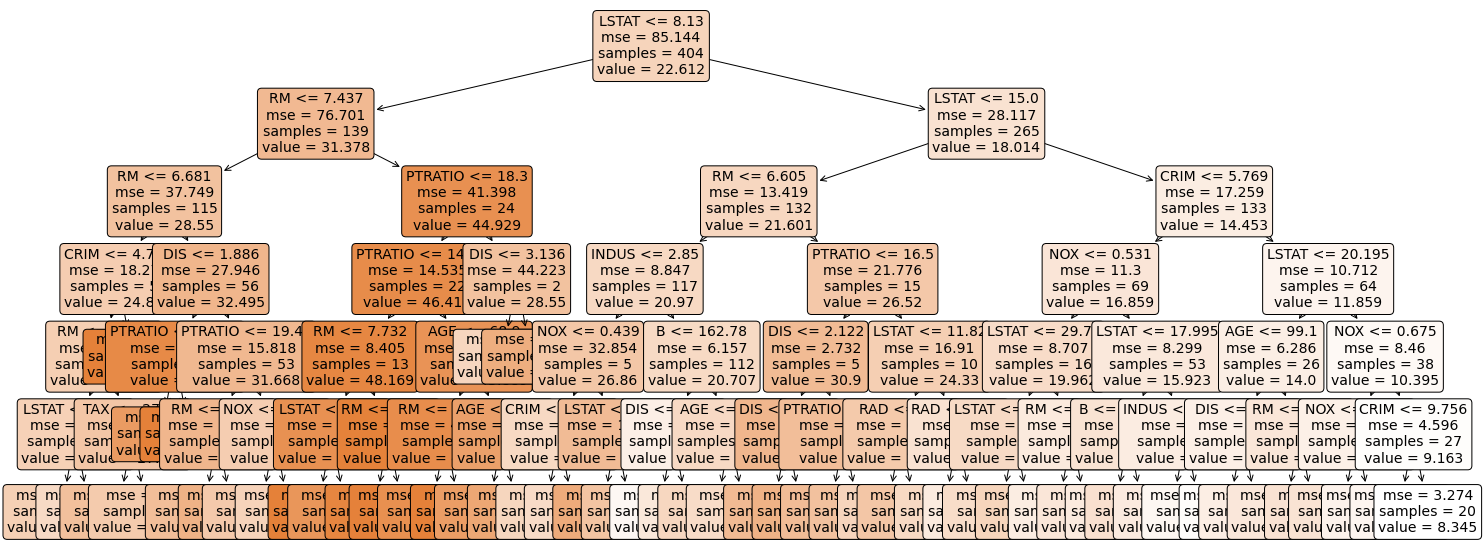

In [49]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=X.columns, 
              class_names=Y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

###### DecisionTreeRegressor(max_depth=6)

###### я попробовал max_depth с 4,5,6,7 из которых max_depth из 6 дал мне наивысший балл по тестовым данным. 

###### Внизу я оставил код, чтобы показать, что я пытался использовать graphviz для визуализации, но безрезультатно, постоянно выдает какую-то ошибку. Я импортировал папку graphviz в conda, искал также ответы на форумах, многие сталкивались с подобной проблемой и не смогли решить. Выдает тип ошибки InvocationException: GraphViz's executables not found. В итоге я использовал  plot_tree из sklearn.tree 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

In [52]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=6)

In [53]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

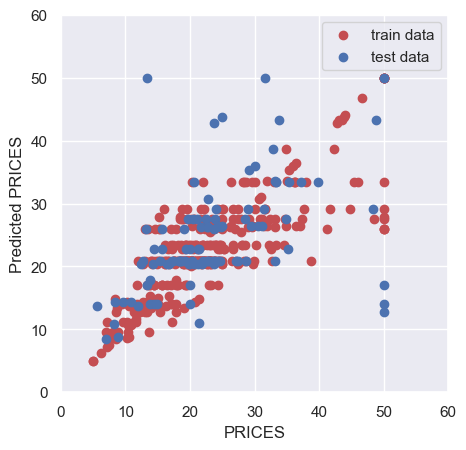

In [54]:

plt.figure(figsize=(5, 5), dpi=100)
sns.set()
plt.xlabel("PRICES")
plt.ylabel("Predicted PRICES")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.scatter(Y_train, y_pred_train, lw=1, color="r", label="train data")
plt.scatter(Y_test, y_pred_test, lw=1, color="b", label="test data")
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import r2_score
R2 = r2_score(Y_test, y_pred_test)
R2

0.05049410582077973

In [56]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
export_graphviz(regressor, out_file="tree-structure.dot", feature_names=X_train.columns, filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="tree-structure.dot")
Image(g.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
 from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier().fit(boston, y)

In [ ]:
import sklearn
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_regression

# Generate a simple dataset
X, y = make_regression(n_features=2, n_informative=2, random_state=0)
clf = DecisionTreeRegressor(random_state=0, max_depth=2)
clf.fit(X, y)
# Visualize the tree
graphviz.Source(sklearn.tree.export_graphviz(clf)).view()